In [1]:
from sklearn.impute import SimpleImputer
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from sklearn.preprocessing import StandardScaler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/math482-2024-2025-1-hw-04/sample_submission.csv
/kaggle/input/math482-2024-2025-1-hw-04/train.csv
/kaggle/input/math482-2024-2025-1-hw-04/test.csv


In [2]:
data_train = pd.read_csv("/kaggle/input/math482-2024-2025-1-hw-04/train.csv") #reading train data
data_test = pd.read_csv("/kaggle/input/math482-2024-2025-1-hw-04/test.csv") #reading test data

# Overview of the Data


**Training Data**

The training dataset contains 22500 rows and 21 features.

**Features**:  Include abstract column names that suggest no information about the data. 7 of the 21 features have categorical values and the rest has numerical values.

**Target Variable**:  6 classes from 0 to 5.

**Missing Values**:  All features have missing values. Number of the missing rows is <3100 for each feature. 

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          22500 non-null  int64  
 1   feature_01  20096 non-null  float64
 2   feature_02  19612 non-null  object 
 3   feature_03  20033 non-null  object 
 4   feature_04  20141 non-null  float64
 5   feature_05  20455 non-null  float64
 6   feature_06  19557 non-null  float64
 7   feature_07  19745 non-null  float64
 8   feature_08  20973 non-null  float64
 9   feature_09  19882 non-null  object 
 10  feature_10  20345 non-null  object 
 11  feature_11  19698 non-null  float64
 12  feature_12  19869 non-null  float64
 13  feature_13  19417 non-null  float64
 14  feature_14  21257 non-null  object 
 15  feature_15  20853 non-null  float64
 16  feature_16  20289 non-null  float64
 17  feature_17  19406 non-null  float64
 18  feature_18  21219 non-null  float64
 19  feature_19  21088 non-nul

In [4]:
# Check for missing values in the dataset
missing_values = data_train.isnull().sum()

# Display only columns with missing values
missing_columns = missing_values[missing_values > 0]

if missing_columns.empty:
    print("No missing values in the dataset.")
else:
    print("Missing values found:")
    print(missing_columns)

Missing values found:
feature_01    2404
feature_02    2888
feature_03    2467
feature_04    2359
feature_05    2045
feature_06    2943
feature_07    2755
feature_08    1527
feature_09    2618
feature_10    2155
feature_11    2802
feature_12    2631
feature_13    3083
feature_14    1243
feature_15    1647
feature_16    2211
feature_17    3094
feature_18    1281
feature_19    1412
feature_20    1371
feature_21    1943
dtype: int64


**Test Data**

The test dataset contains 7500 rows and 21 features and there are missing values in each feature. It matches the structure of the training data.

In [5]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          7500 non-null   int64  
 1   feature_01  6737 non-null   float64
 2   feature_02  6540 non-null   object 
 3   feature_03  6660 non-null   object 
 4   feature_04  6700 non-null   float64
 5   feature_05  6815 non-null   float64
 6   feature_06  6481 non-null   float64
 7   feature_07  6582 non-null   float64
 8   feature_08  6972 non-null   float64
 9   feature_09  6642 non-null   object 
 10  feature_10  6738 non-null   object 
 11  feature_11  6594 non-null   float64
 12  feature_12  6618 non-null   float64
 13  feature_13  6459 non-null   float64
 14  feature_14  7052 non-null   object 
 15  feature_15  6989 non-null   float64
 16  feature_16  6728 non-null   float64
 17  feature_17  6465 non-null   float64
 18  feature_18  7061 non-null   float64
 19  feature_19  7011 non-null  

In [6]:
# Check for missing values in the dataset
missing_values = data_test.isnull().sum()

# Display only columns with missing values
missing_columns = missing_values[missing_values > 0]

if missing_columns.empty:
    print("No missing values in the dataset.")
else:
    print("Missing values found:")
    print(missing_columns)

Missing values found:
feature_01     763
feature_02     960
feature_03     840
feature_04     800
feature_05     685
feature_06    1019
feature_07     918
feature_08     528
feature_09     858
feature_10     762
feature_11     906
feature_12     882
feature_13    1041
feature_14     448
feature_15     511
feature_16     772
feature_17    1035
feature_18     439
feature_19     489
feature_20     442
feature_21     682
dtype: int64


**Distribution of the Features**

I will use histograms to see the distribution of the features 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

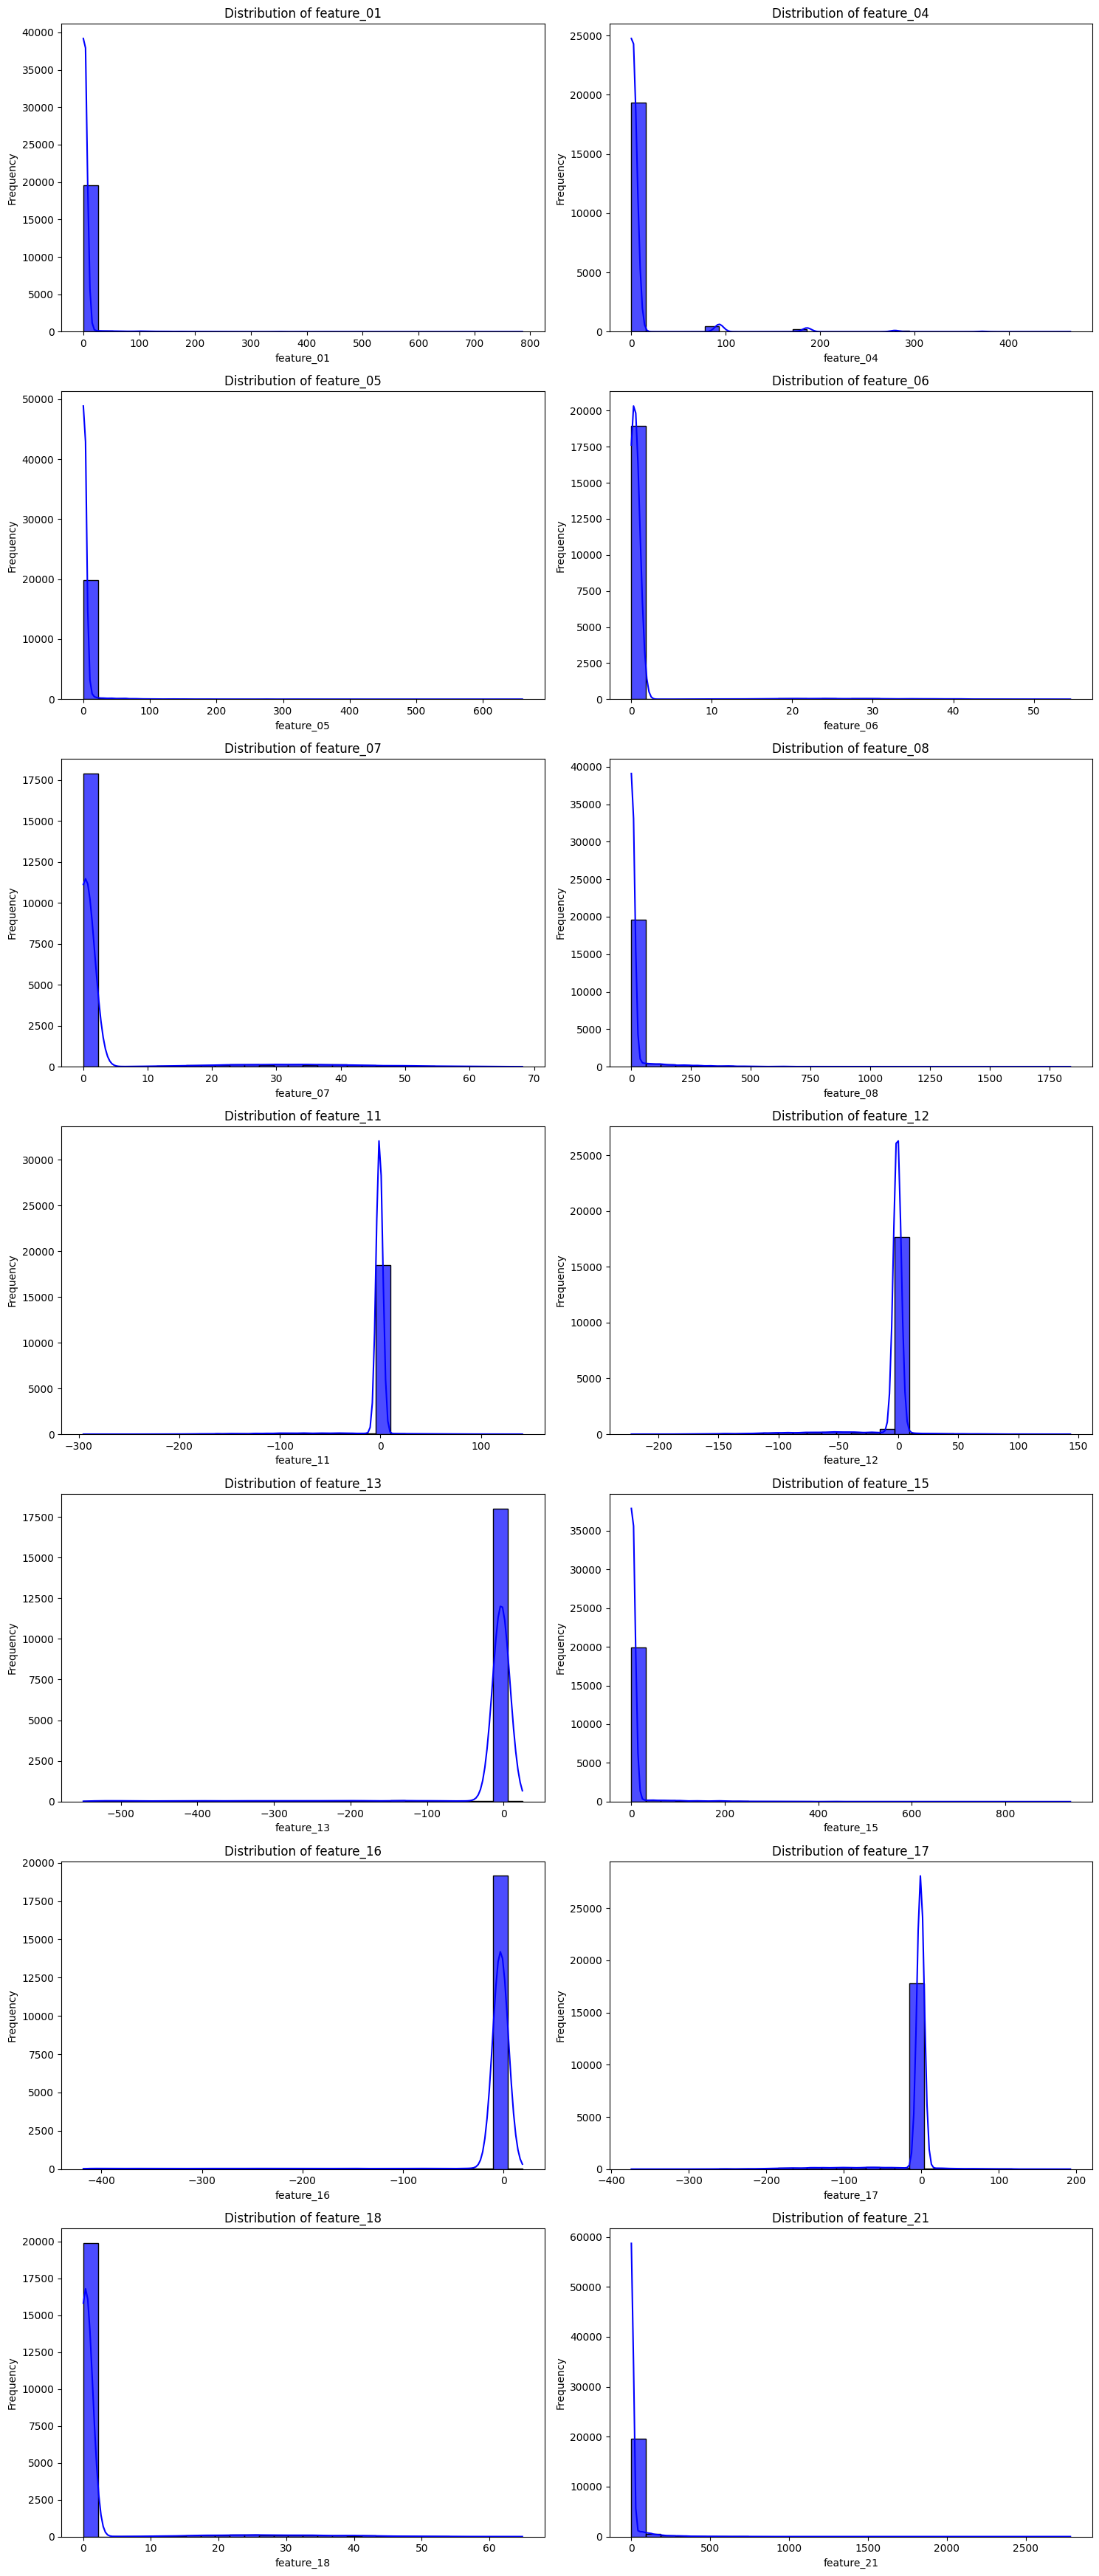

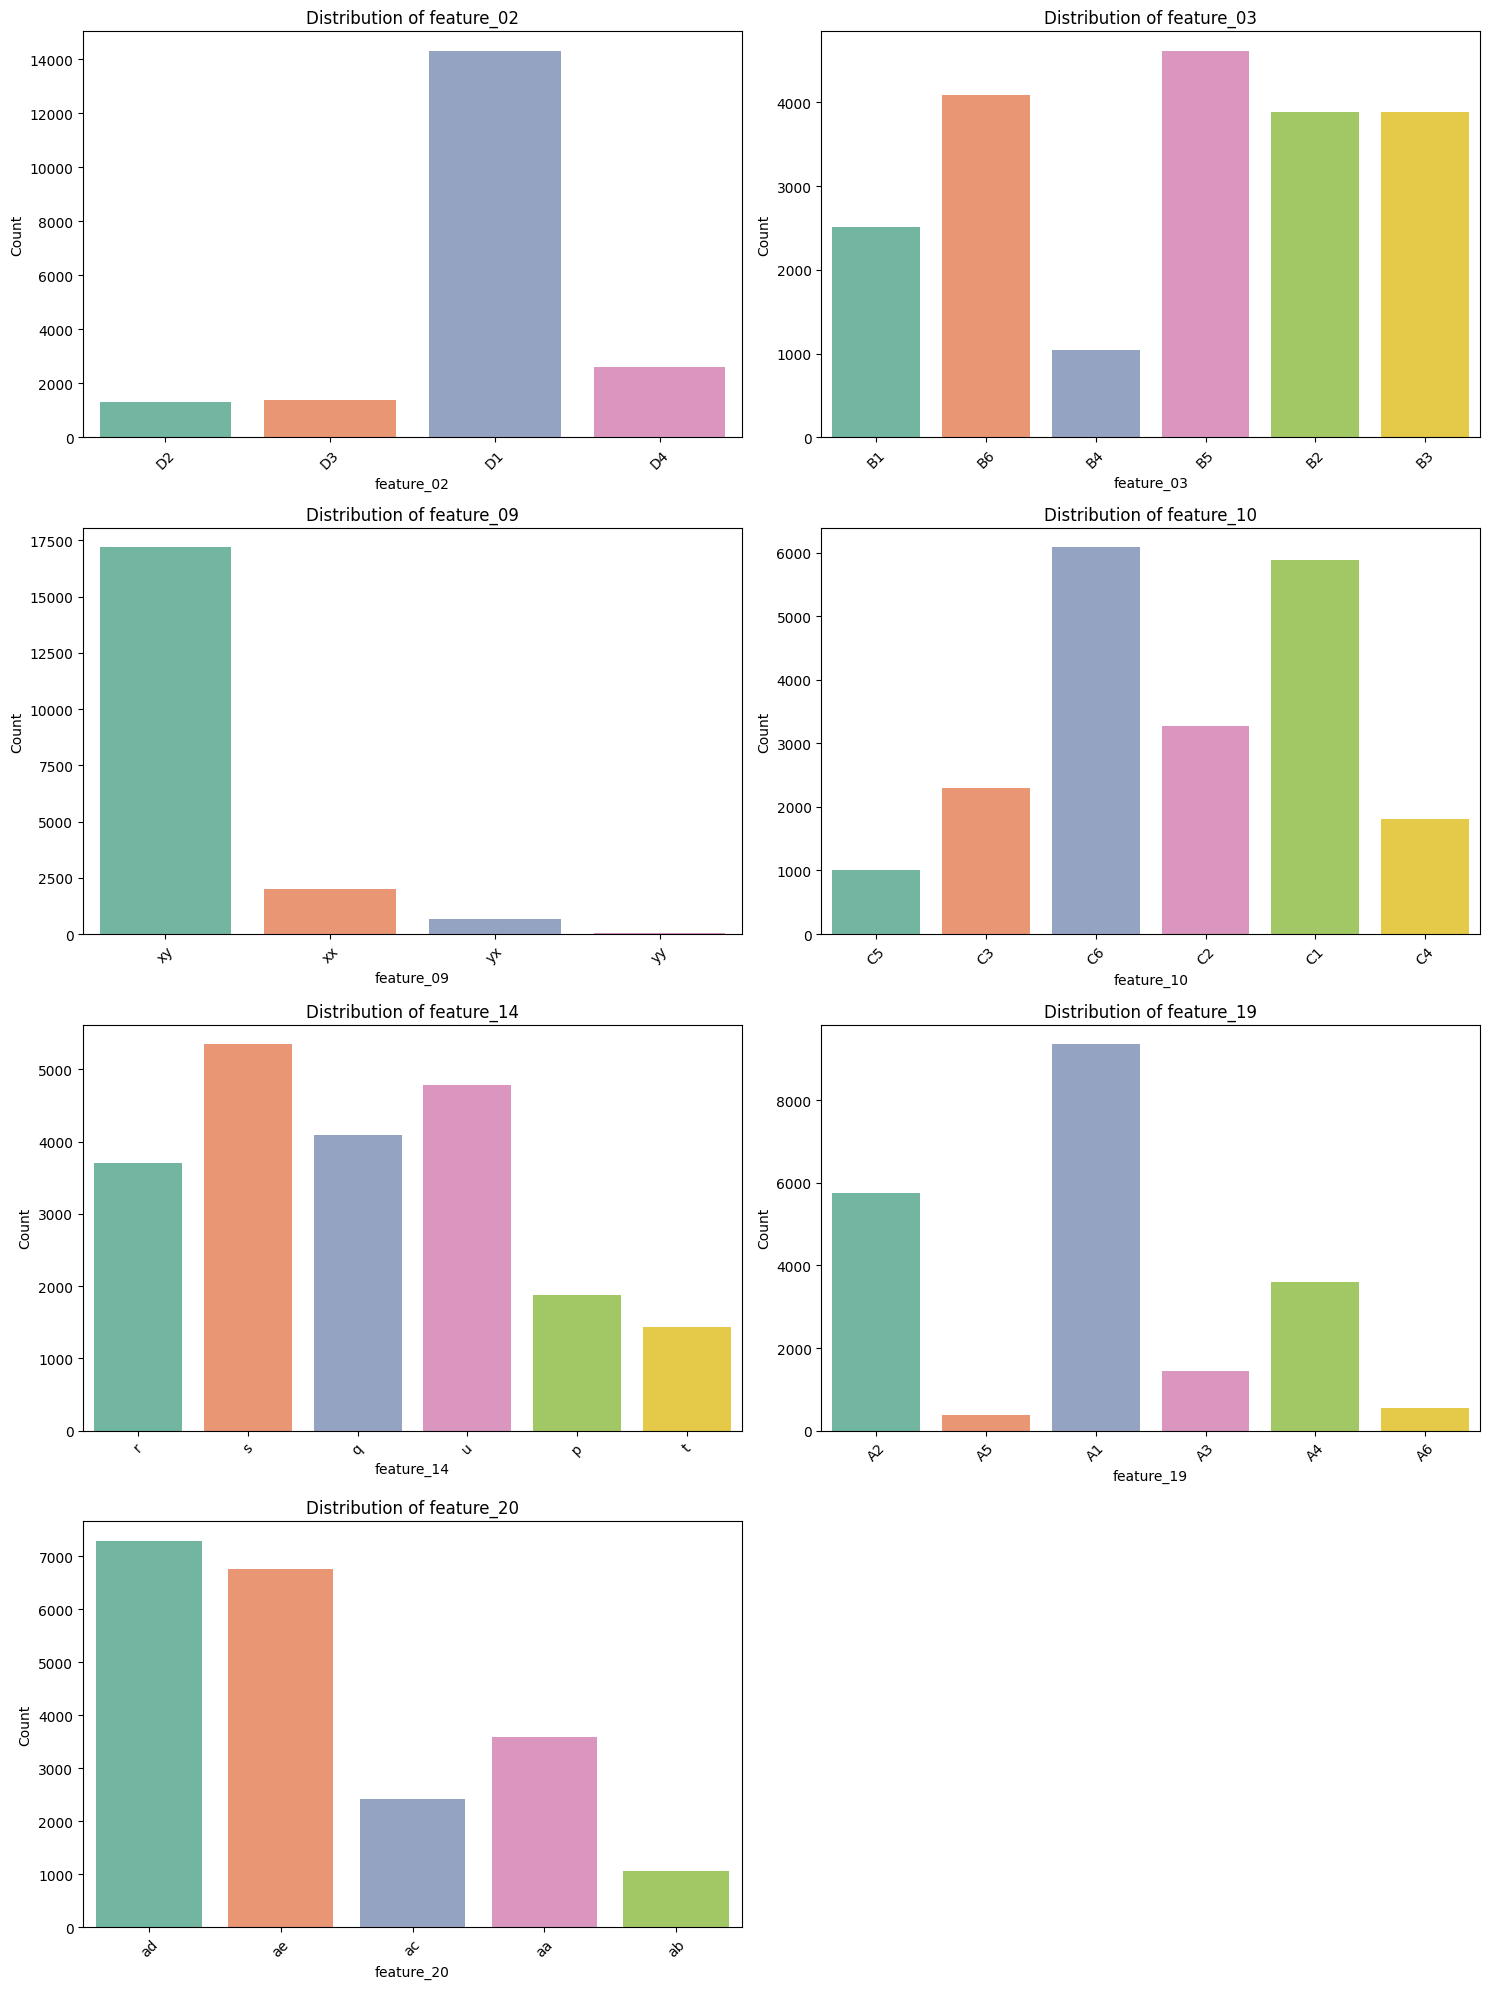

In [7]:
# Drop 'id' column as it is not a feature and saving it for possible future use

data_id = data_train["id"]
data_train = data_train.drop(columns=['id'])

# Separate numeric and categorical features
numeric_features = data_train.select_dtypes(include=['number']).columns.tolist()
categorical_features = data_train.select_dtypes(include=['object']).columns.tolist()
target = data_train["target"]
numeric_features.remove("target")


# Plot distributions for numeric features

# Set the grid size (rows x cols)
n_cols = 2  # Number of columns in the grid
n_rows = -(-len(numeric_features) // n_cols)  # Calculate required rows (ceiling division)

# Create subplots for numeric features
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust figsize for better visibility

# Loop through each numeric feature to plot
for i, feature in enumerate(numeric_features):
    row, col = divmod(i, n_cols)  # Calculate row, col position in the grid
    ax = axes[row, col] if n_rows > 1 else axes[col]  # Handle 1-row case
    
    sns.histplot(data_train[feature], kde=True, bins=30, color='blue', edgecolor='black', alpha=0.7, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

# Remove any empty subplots (if features < total grid slots)
for i in range(len(numeric_features), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

# Plot distributions for categorical features

# Set the grid size (rows x cols)
n_cols = 2  # Number of columns in the grid
n_rows = -(-len(categorical_features) // n_cols)  # Calculate required rows (ceiling division)

# Create subplots for categorical features
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust figsize for better visibility

# Loop through each categorical feature to plot
for i, feature in enumerate(categorical_features):
    row, col = divmod(i, n_cols)  # Calculate row, col position in the grid
    ax = axes[row, col] if n_rows > 1 else axes[col]  # Handle 1-row case
    
    sns.countplot(x=data_train[feature], palette='Set2', ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Remove any empty subplots (if features < total grid slots)
for i in range(len(categorical_features), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

Categorical features seem fine but we can't really see anything meaningful in numerical features because of the outliers. So, I will remove the outliers and see the distribtion again. Also, we can see that feature_04 is categorical rather than numerical. so we need to include that in the categorical features.

In [8]:
categorical_features.append("feature_04")
numeric_features.remove("feature_04")

# Dealing With the Outliers

I will use the **IQR method** to **cap** the outliers in numerical data. That means I will identify the outliers (in this case the values that remain outside of the **first** and the **third** quantile extended by 1.5 times of the IQR value) then I cap the outliers to the lower or upper bound rather than removing them because when I tried to remove them I was left with so few data.

In [9]:
def cap_outliers_iqr(df, numeric_features, multiplier=1.5):
    for feature in numeric_features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
      
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        
        # Cap values outside the bounds
        df[feature] = df[feature].clip(lower=lower_bound, upper=upper_bound)
    
    return df

# Cap outliers instead of removing them
data_train_capped = cap_outliers_iqr(data_train.copy(), numeric_features, multiplier=1.5)





/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

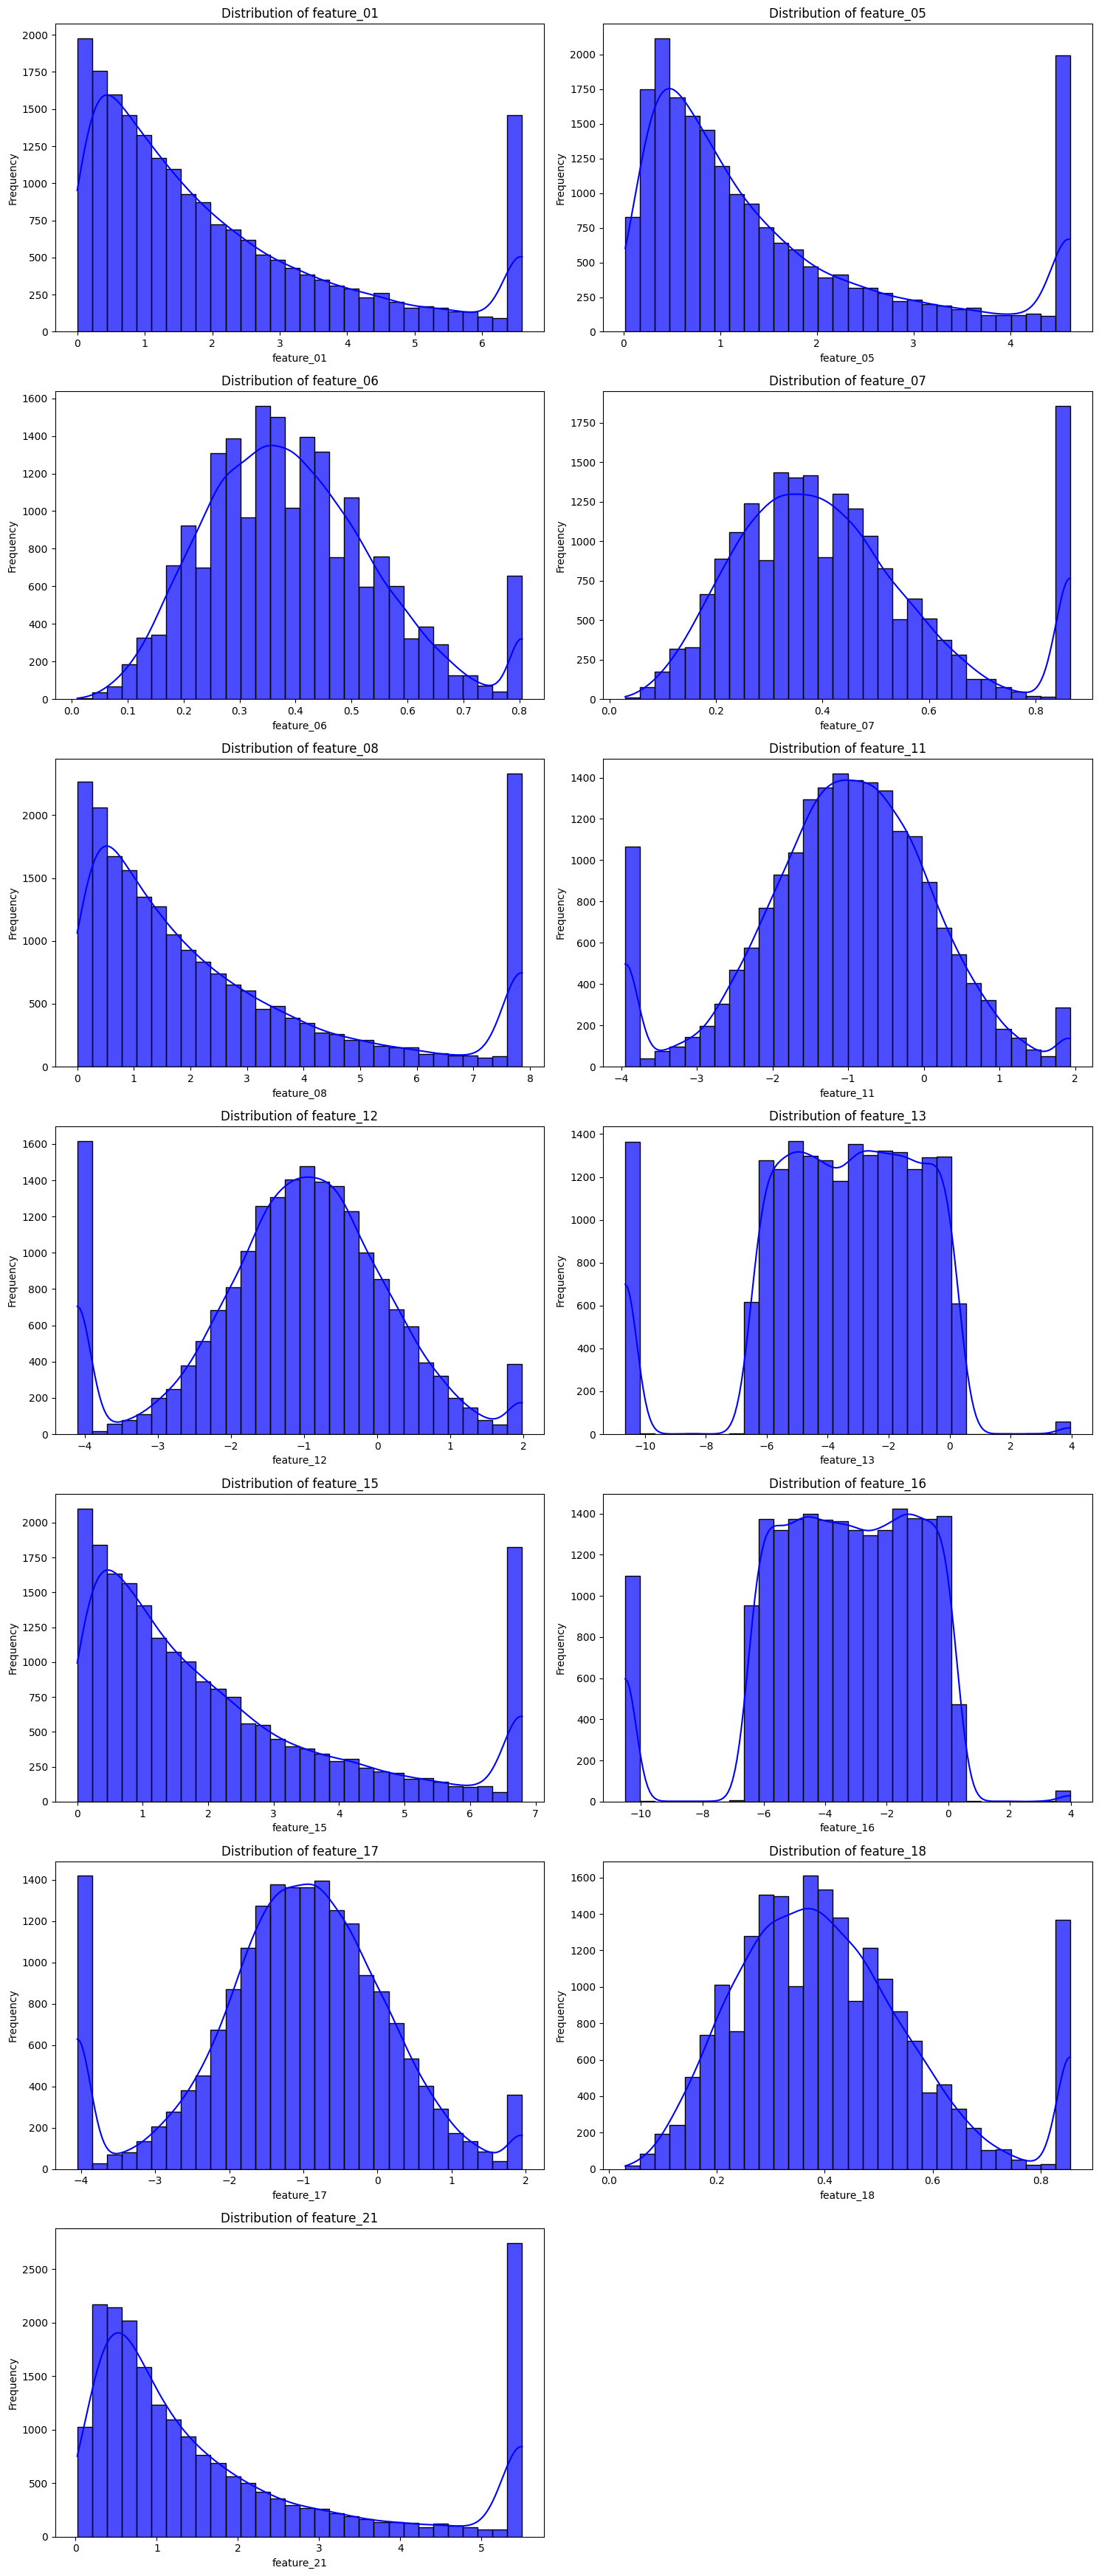

In [10]:
# Plot distributions for numeric features

# Set the grid size (rows x cols)
n_cols = 2  # Number of columns in the grid
n_rows = -(-len(numeric_features) // n_cols)  # Calculate required rows (ceiling division)

# Create subplots for numeric features
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust figsize for better visibility

# Loop through each numeric feature to plot
for i, feature in enumerate(numeric_features):
    row, col = divmod(i, n_cols)  # Calculate row, col position in the grid
    ax = axes[row, col] if n_rows > 1 else axes[col]  # Handle 1-row case
    
    sns.histplot(data_train_capped[feature], kde=True, bins=30, color='blue', edgecolor='black', alpha=0.7, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

# Remove any empty subplots (if features < total grid slots)
for i in range(len(numeric_features), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()



Now that we dealt with the outliers and the distribution of the numeric data is looking good, we can handle the missing data.

# Handling Missing Data

Before handling the missing values, lets check the **correlation matrix** for the **numerical features** so that we can decide a method to use for imputation of them. I won't check the categorical features because it is unnecessary since using simple imputation with most_frequent method is good enough.

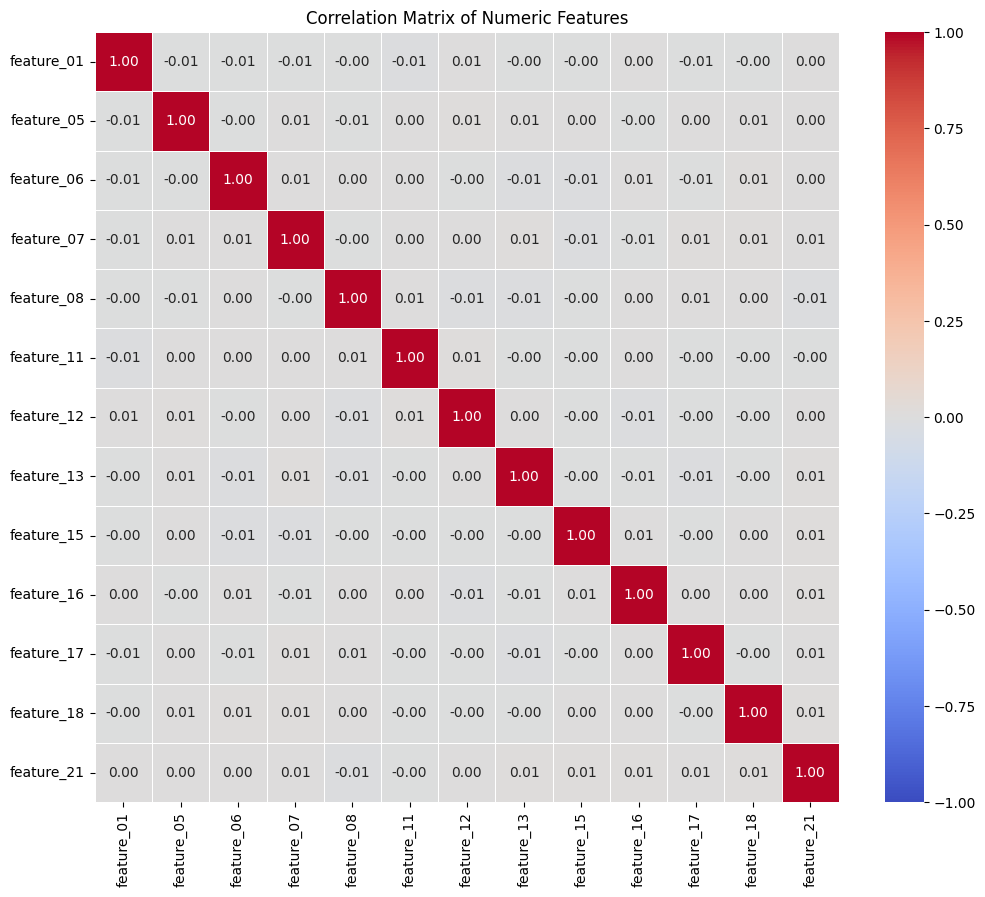

In [11]:

# Compute the correlation matrix for numeric features
correlation_matrix = data_train_capped[numeric_features].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

To my surprise the numeric features are suspiciously independent. So we don't need to use computationally intensive methods like kNN or regression imputation as they work well with dependent features but not with independent features. So, I will use Simple Imputation with median method because we capped many outliers so the data is a bit skewed and the median is robust in this kind of situations. 

In [12]:

# Median imputation for numeric features
numeric_imputer = SimpleImputer(strategy='median')
data_train_capped[numeric_features] = numeric_imputer.fit_transform(data_train_capped[numeric_features])
data_test[numeric_features] = numeric_imputer.transform(data_test[numeric_features])

# Mode (most frequent) imputation for categorical features
categorical_imputer = SimpleImputer(strategy='most_frequent')
data_train_capped[categorical_features] = categorical_imputer.fit_transform(data_train_capped[categorical_features])
data_test[categorical_features] = categorical_imputer.transform(data_test[categorical_features])

# Verify missing values are handled
print("Remaining missing values per feature:")
print(data_train_capped.isnull().sum())
print("Remaining missing values per feature:")
print(data_test.isnull().sum())


Remaining missing values per feature:
feature_01    0
feature_02    0
feature_03    0
feature_04    0
feature_05    0
feature_06    0
feature_07    0
feature_08    0
feature_09    0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
target        0
dtype: int64
Remaining missing values per feature:
id            0
feature_01    0
feature_02    0
feature_03    0
feature_04    0
feature_05    0
feature_06    0
feature_07    0
feature_08    0
feature_09    0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
dtype: int64


We have successfully dealt with the missing values.

# Checking Feature Correlation with Target

I will check the correlation of numeric features using the ANOVA F-statistic and Chi-squared test for the categorical features.

In **ANOVA method** we group the each feature based on the target value of each row. Then we check the **varience across the groups** and **varience within each group** and compare them. If the ratio is large, it suggests that the variability between group means is much larger than the variability within groups, which means supports that **dividing the feature space based on the target value contributes to predict the feature accurately.** Because each group mean is different than each other but the values within each group doesn't vary too much. Which is a good dividing of the feature space.

The **p-value** I compute in the code is the probability of observing the data when the **null hyphothesis** is correct. The null hyphothesis in our case is the case when grouping the feature space based on the target value results in **high variablity within each group** and **low variety between groups.** So, the low p-value means that the null hyphothesis is not valid therefore the feture is correlated with the target by the reasoning above.

In [13]:
from scipy.stats import f_oneway

# Store features with high p-values (not correlated)
uncorrelated_numeric_features = []

# Perform ANOVA for each numeric feature
for feature in numeric_features:
    # Split the data into groups based on target classes
    groups = [data_train_capped[data_train_capped["target"] == category][feature] for category in data_train_capped["target"].unique()]
    
    # Compute F-statistic and p-value
    f_stat, p_value = f_oneway(*groups)
    
    # Print results
    print(f"Feature: {feature}, F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")
    
    # If p-value is high consider the feature uncorrelated
    if p_value > 0.05:
        uncorrelated_numeric_features.append(feature)

print("\nUncorrelated Numeric Features:", uncorrelated_numeric_features)


Feature: feature_01, F-statistic: 4.54, p-value: 0.0004
Feature: feature_05, F-statistic: 302.28, p-value: 0.0000
Feature: feature_06, F-statistic: 2.20, p-value: 0.0516
Feature: feature_07, F-statistic: 0.97, p-value: 0.4327
Feature: feature_08, F-statistic: 35.16, p-value: 0.0000
Feature: feature_11, F-statistic: 1.69, p-value: 0.1331
Feature: feature_12, F-statistic: 1.23, p-value: 0.2925
Feature: feature_13, F-statistic: 86.34, p-value: 0.0000
Feature: feature_15, F-statistic: 317.81, p-value: 0.0000
Feature: feature_16, F-statistic: 12.29, p-value: 0.0000
Feature: feature_17, F-statistic: 0.51, p-value: 0.7674
Feature: feature_18, F-statistic: 1.45, p-value: 0.2043
Feature: feature_21, F-statistic: 19.26, p-value: 0.0000

Uncorrelated Numeric Features: ['feature_06', 'feature_07', 'feature_11', 'feature_12', 'feature_17', 'feature_18']


In the **chi-squared** method we check the **actual contigency** table and the **expected contigency table** where the feature and the target are independent. If the difference between the two is large, then that means our feature is correlated with the target. The p-value corresponds to the probability of predicting the actual contigency table based on the expected contigency table. **If p-value is small**, the feature is **correlated** with the target

In [14]:
from scipy.stats import chi2_contingency

uncorrelated_categorical_features = []

# Loop through each categorical feature and run the Chi-squared test
for feature in categorical_features:
    # Contingency table for the feature and the target
    contingency_table = pd.crosstab(data_train_capped[feature], data_train["target"])
    
    # Compute Chi-squared, p-value, degrees of freedom, and expected counts
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print results
    print(f"Feature: {feature}, Chi2: {chi2:.2f}, p-value: {p:.1000f}")
    
    # If p-value > 0.05, consider the feature not correlated with the target
    if p > 0.05:
        uncorrelated_categorical_features.append(feature)

print("\nUncorrelated Categorical Features:", uncorrelated_categorical_features)


Feature: feature_02, Chi2: 681.68, p-value: 0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001486992309226031493685089842633157978066029604744132875939142393532662923633754550197597101888881628683389328639893686385783557516877771121189184038409468380077638503962382434079102264489819432741039320937473126403718228863170521249089001310027582157729543936565900171168876358952607905256277478822245450681204105326313475018626397705645558744436129927635192871093750000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

I formatted the p-values in this ridicilous 1000 decimal because I wanted to show they are extremely small numbers so we can conclude easily that all categorical features are correlated with the target. We can actually confirm this in a graph. The separation between the categories can be seen in the graphs below.

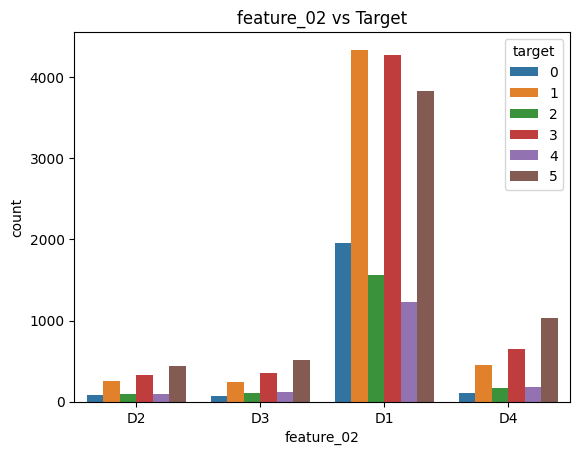

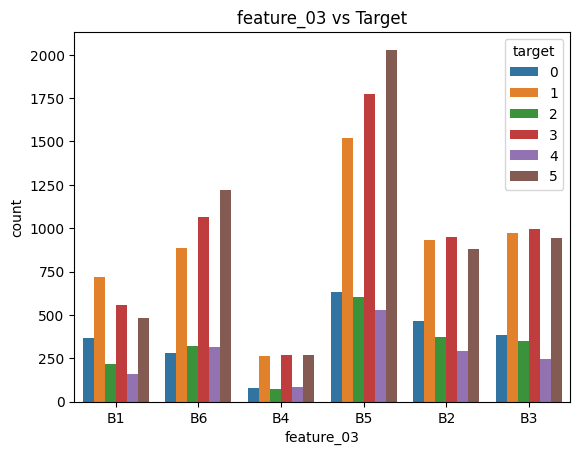

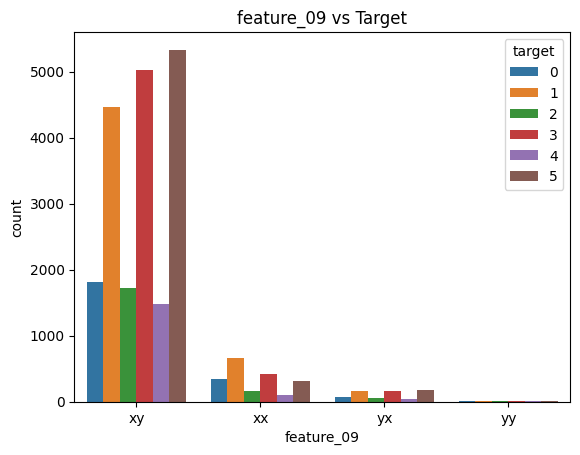

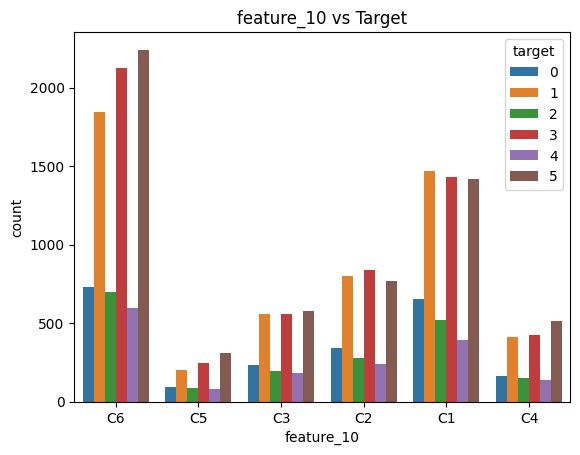

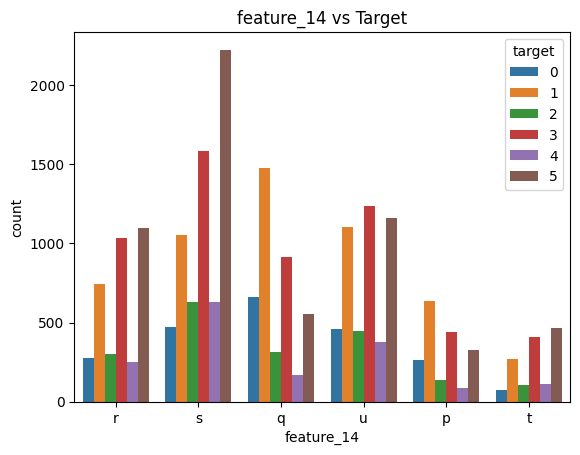

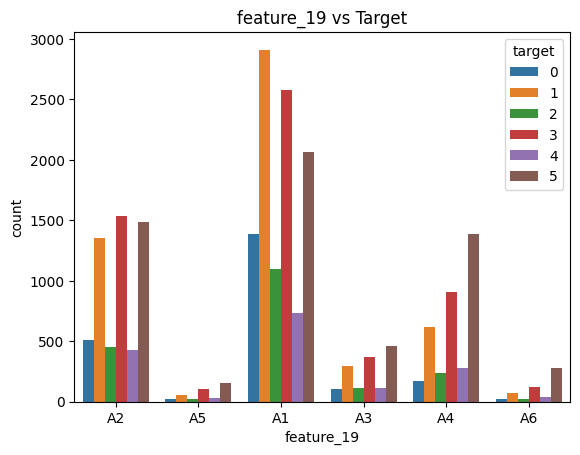

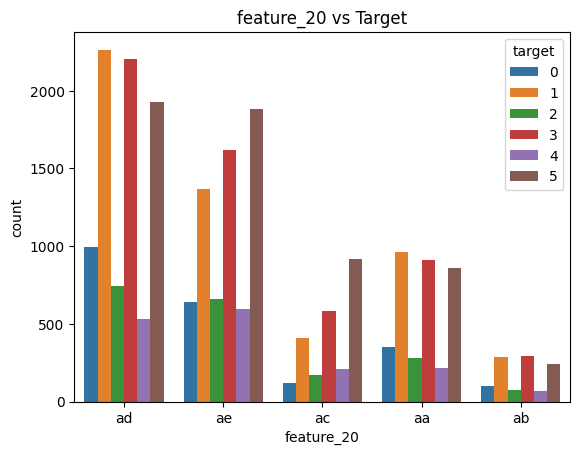

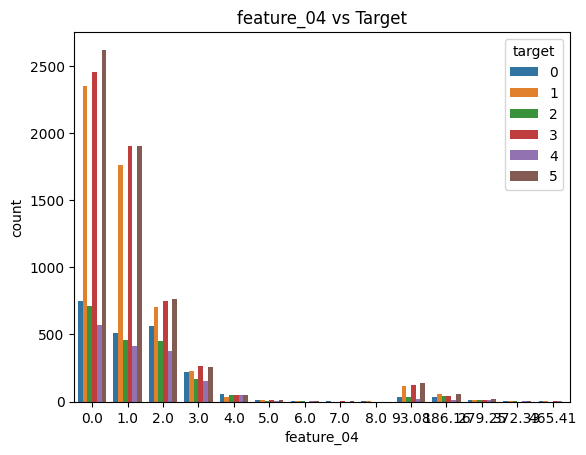

In [15]:
# Plot the feature vs target
for feature in categorical_features:
    sns.countplot(x=data_train_capped[feature], hue=data_train['target'])
    plt.title(f'{feature} vs Target')
    plt.show()


So we will only exclude the non-correlated numeric features from the data and start to build the model.

In [16]:
# Drop the uncorrelated features from the training data
data_train_filtered = data_train_capped.drop(columns=uncorrelated_numeric_features)

# Drop the same features from the test data
data_test_filtered = data_test.drop(columns=uncorrelated_numeric_features)

print(f"Original shape of data_train: {data_train_capped.shape}")
print(f"Shape after dropping uncorrelated features: {data_train_filtered.shape}")


Original shape of data_train: (22500, 22)
Shape after dropping uncorrelated features: (22500, 16)


# Converting Categorical Data and Scaling Numeric Data

This is the last preprocessing step. I will use ordinal encoder for the categorical features that have natural ordering amon them and One Hot Encoder for the rest of the categorical data. Since I will be building a NN I should scale the numerical features so that the features with higher values don't dominate the training. 

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Define your columns
numerical_columns = [item for item in numeric_features if item not in uncorrelated_numeric_features]
categorical_columns = [col for col in categorical_features if col not in ['feature_02', 'feature_03', 'feature_10', 'feature_19', 'feature_04']]
ordinal_columns = ['feature_02', 'feature_03', 'feature_10', 'feature_19', 'feature_04']

# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Standard scaling for numerical columns
        ('cat_onehot', OneHotEncoder(handle_unknown='ignore'), categorical_columns),  # One-hot encoding for non-ordinal categorical columns
        ('cat_ordinal', OrdinalEncoder(), ordinal_columns)  # Ordinal encoding for ordinal categorical columns
    ],
    sparse_threshold=0  # Ensure output is a dense array
)

# Transform the data
X_train = pd.DataFrame(preprocessor.fit_transform(data_train_filtered),
                       columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(data_test_filtered),
                      columns=preprocessor.get_feature_names_out())

# Target variable
y_train = data_train_filtered["target"]



# Building the Model

Keras doesn't support f1 score natively so I will define a custom MicroF1Score based on the document given in the competition. I will use this function to train my model on.

In [18]:
import tensorflow as tf

class MicroF1Score(tf.keras.metrics.Metric):
    def __init__(self, name='micro_f1_score', **kwargs):
        super(MicroF1Score, self).__init__(name=name, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros')
        self.fp = self.add_weight(name='false_positives', initializer='zeros')
        self.fn = self.add_weight(name='false_negatives', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Convert predictions to class labels
        y_pred = tf.argmax(y_pred, axis=1)
        y_true = tf.cast(y_true, dtype=tf.int64)

        # Calculate true positives, false positives, and false negatives
        tp = tf.reduce_sum(tf.cast(y_pred == y_true, tf.float32))
        fp = tf.reduce_sum(tf.cast((y_pred != y_true) & (y_pred >= 0), tf.float32))
        fn = tf.reduce_sum(tf.cast((y_pred != y_true) & (y_true >= 0), tf.float32))

        # Update state variables
        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)


I will build a NN for this task and use keras tuner to optimize the hyperparameters. The model is designed with three dense layers, each followed by dropout layers to prevent overfitting. The number of neurons, dropout rates, learning rates, and optimizer types are tuned using Keras Tuner's RandomSearch method. 

The optimizer types being tuned include Adam (Adaptive Moment Estimation), RMSprop (Root Mean Square Propagation), and SGD (Stochastic Gradient Descent). These algorithms are critical for weight updates during backpropagation:

**Adam**: combines the benefits of momentum (smoothing out gradients) and adaptive learning rates (scaling updates based on parameter importance), making it highly versatile and efficient for most tasks.

**RMSprop**: adjusts the learning rate dynamically by maintaining a moving average of squared gradients. This helps stabilize training in non-stationary problems or with complex loss surfaces.

**SGD**: updates weights using a fixed learning rate, calculated from the gradient of the loss function. While simpler, it can be enhanced with momentum to overcome challenges like local minima or slow convergence.

In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input  



def build_model(hp):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),  # Use Input layer here
        Dense(
            units=hp.Int('neurons_1', min_value=64, max_value=256, step=32), 
            activation='relu'
        ),
        Dropout(hp.Float('dropout_rate_1', min_value=0.0, max_value=0.5, step=0.1)),
        Dense(
            units=hp.Int('neurons_2', min_value=32, max_value=128, step=16), 
            activation='relu'
        ),
        Dropout(hp.Float('dropout_rate_2', min_value=0.0, max_value=0.5, step=0.1)),
        Dense(
            units=hp.Int('neurons_3', min_value=16, max_value=64, step=8), 
            activation='relu'
        ),
        Dropout(hp.Float('dropout_rate_3', min_value=0.0, max_value=0.5, step=0.1)),
        Dense(6, activation='softmax')
    ])

    optimizer_choice = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    optimizer = {'adam': Adam, 'rmsprop': RMSprop, 'sgd': SGD}[optimizer_choice](
        learning_rate=hp.Choice('learning_rate', [0.01, 0.001, 0.0001])
    )
    
    model.compile(
    optimizer=optimizer, 
    loss='sparse_categorical_crossentropy', 
    metrics=[MicroF1Score()]  # Use micro F1 as a metric
)
    
    return model

tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective=kt.Objective('val_micro_f1_score', direction='max'),  # Use micro F1-score
    executions_per_trial=1,
    directory='my_tuner_dir',
    max_trials=500,
    project_name='keras_tuner_search'
)

tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(X_train, y_train, epochs=50, validation_split=0.2)
# Make predictions on **X_test**

predictions = best_model.predict(X_test)

# Get the predicted classes (most probable class for each input)
predicted_classes = predictions.argmax(axis=1)  # Get the class with the highest probability


# 8. Create the submission file
submission = pd.DataFrame({
    'id': data_test["id"],
    'target': predicted_classes
})
submission.to_csv('submission.csv', index=False)

print("Submission file created: submission.csv")

Trial 8 Complete [00h 00m 14s]
val_micro_f1_score: 0.2549387216567993

Best val_micro_f1_score So Far: 0.2576237618923187
Total elapsed time: 00h 01m 58s

Search: Running Trial #9

Value             |Best Value So Far |Hyperparameter
224               |256               |neurons_1
0.2               |0                 |dropout_rate_1
64                |32                |neurons_2
0.1               |0.3               |dropout_rate_2
64                |40                |neurons_3
0                 |0.1               |dropout_rate_3
rmsprop           |adam              |optimizer
0.001             |0.0001            |learning_rate

Epoch 1/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5749 - micro_f1_score: 0.2362 - val_loss: 1.4444 - val_micro_f1_score: 0.2363
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4503 - micro_f1_score: 0.2274 - val_loss: 1.4173 - val_micro_f1_score: 0.2321
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4238 - micro_f1_scor